In [43]:
from rsome import ro
from rsome import grb_solver as grb
import rsome as rso
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# ref: https://xiongpengnus.github.io/rsome/example_ro_portfolio#ref1
#L1 Norm: e.g., X=[3,4], ||x||1 = |3| + |4| = 7
# L2 Norm: e.g., X=[3,4], sqrt(|3|^2 + |4|^2) = 5
# L-infinity: e.g.,  X= [-6, 4, 2], ||x||inf = 6 (the largest magnitude among each element of a vector)

n = 150                                 # number of stocks
i = np.arange(1, n+1)                   # indices of stocks
p = 1.15 + i*0.05/150                   # mean returns
delta = 0.05/450 * (2*i*n*(n+1))**0.5   # deviations of returns
Gamma = 5                               # budget of uncertainty

model = ro.Model()              
x = model.dvar(n)                       # fractions of investment
z = model.rvar(n)                       # random variables

model.maxmin((p + delta*z) @ x,         # the max-min objective
             rso.norm(z, np.infty) <=1, # uncertainty set constraints
             rso.norm(z, 1) <= Gamma)   # uncertainty set constraints
model.st(sum(x) == 1)                   # summation of x is one
model.st(x >= 0)                        # x is non-negative

model.solve(grb)                        # solve the model by Gurobi

Being solved by Gurobi...
Solution status: 2
Running time: 0.0100s


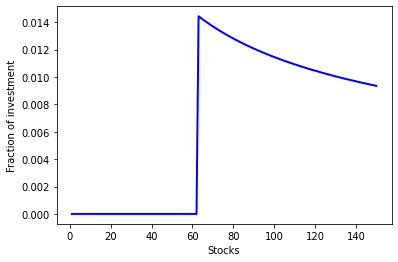

Objective value: 1.1709


In [45]:
obj_val = model.get()                   # the optimal objective value
x_sol = x.get()                         # the optimal investment decision

plt.plot(range(1, n+1), x_sol, linewidth=2, color='b')
plt.xlabel('Stocks')
plt.ylabel('Fraction of investment')
plt.show()
print('Objective value: {0:0.4f}'.format(obj_val))

In [46]:
# Robust/Robustness Knapsack
# ref: https://xiongpengnus.github.io/rsome/example_ro_knapsack